<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/12_30code4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
## 必要なライブラリのimport
import csv
import random
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [76]:
## データについて

### データフイルのpath
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data.csv'

#### 穴0データ
with open(no_hole_path) as f0:
  lst_f0 = list(csv.reader(f0))

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  lst_fs1 = list(csv.reader(fs1))
with open(four_holes_size_path) as fs2:
  lst_fs2 = list(csv.reader(fs2))
with open(nine_holes_size_path) as fs3:
  lst_fs3 = list(csv.reader(fs3))
with open(sixteen_holes_size_path) as fs4:
  lst_fs4 = list(csv.reader(fs4))
with open(twentyfive_holes_size_path) as fs5:
  lst_fs5 = list(csv.reader(fs5))

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  lst_fp1 = list(csv.reader(fp1))
with open(four_holes_position_path) as fp2:
  lst_fp2 = list(csv.reader(fp2))
with open(nine_holes_position_path) as fp3:
  lst_fp3 = list(csv.reader(fp3))
with open(sixteen_holes_position_path) as fp4:
  lst_fp4 = list(csv.reader(fp4))
with open(twentyfive_holes_position_path) as fp5:
  lst_fp5 = list(csv.reader(fp5))

lst_fs1 = random.sample(lst_fs1, 600)
lst_fs2 = random.sample(lst_fs2, 600)
lst_fs3 = random.sample(lst_fs3, 600)
lst_fs4 = random.sample(lst_fs4, 600)
lst_fs5 = random.sample(lst_fs5, 600)
lst_fp1 = random.sample(lst_fp1, 600)
lst_fp2 = random.sample(lst_fp2, 600)
lst_fp3 = random.sample(lst_fp3, 600)
lst_fp4 = random.sample(lst_fp4, 600)
lst_fp5 = random.sample(lst_fp5, 600)

lst_f0 = [r[:-1] for r in lst_f0]
lst_x_fs1 = [r[0] for r in lst_fs1]
lst_x_fs2 = [r[0] for r in lst_fs2]
lst_x_fs3 = [r[0] for r in lst_fs3]
lst_x_fs4 = [r[0] for r in lst_fs4]
lst_x_fs5 = [r[0] for r in lst_fs5]
lst_x_fp1 = [r[0] for r in lst_fp1]
lst_x_fp2 = [r[0] for r in lst_fp2]
lst_x_fp3 = [r[0] for r in lst_fp3]
lst_x_fp4 = [r[0] for r in lst_fp4]
lst_x_fp5 = [r[0] for r in lst_fp5]
lst_y1 = [r[1:-1] for r in lst_fp1]
lst_y2 = [r[1:-1] for r in lst_fp2]
lst_y3 = [r[1:-1] for r in lst_fp3]
lst_y4 = [r[1:-1] for r in lst_fp4]
lst_y5 = [r[1:-1] for r in lst_fp5]

lst_x_fs = lst_x_fs1 + lst_x_fs2 + lst_x_fs3 + lst_x_fs4 + lst_x_fs5
lst_x_fp = lst_x_fp1 + lst_x_fp2 + lst_x_fp3 + lst_x_fp4 + lst_x_fp5
lst_x = lst_x_fs + lst_x_fp
lst_y = lst_y1 + lst_y2 + lst_y3 + lst_y4 + lst_y5

lst_f0 = np.array(lst_f0, dtype=float)
lst_x = np.array(lst_x, dtype=int)
lst_y = np.array(lst_y, dtype=float)

lst_x = lst_x.reshape(2,3000)
lst_x = lst_x.T
lst_y = lst_y - lst_f0

In [77]:
### train用とtest用に分割(4:1)
x_train, x_test, y_train, y_test = train_test_split(lst_x, lst_y, train_size= 0.8, test_size=0.2)

x_train = x_train.reshape(2400,2,1)
x_test = x_test.reshape(600,2,1)

In [78]:
## CNN

### modelの作成
model = Sequential()
### 畳み込み層
model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(2, 1)))
### プーリング層
model.add(MaxPooling1D(2, padding='same'))
### Flatten層
model.add(Flatten())
### 全結合層
model.add(Dense(50, activation='linear'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [79]:
# 学習
epochs = 3000
batch_size = 64
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 501/3000
38/38 [==============================] - 0s 3ms/step - loss: 0.2695 - mae: 0.1612 - val_loss: 0.3458 - val_mae: 0.1723
Epoch 502/3000
38/38 [==============================] - 0s 3ms/step - loss: 0.2383 - mae: 0.1572 - val_loss: 0.3443 - val_mae: 0.1674
Epoch 503/3000
38/38 [==============================] - 0s 2ms/step - loss: 0.2617 - mae: 0.1620 - val_loss: 0.3429 - val_mae: 0.1796
Epoch 504/3000
38/38 [==============================] - 0s 2ms/step - loss: 0.2634 - mae: 0.1663 - val_loss: 0.3480 - val_mae: 0.1664
Epoch 505/3000
38/38 [==============================] - 0s 3ms/step - loss: 0.2216 - mae: 0.1582 - val_loss: 0.3428 - val_mae: 0.1706
Epoch 506/3000
38/38 [==============================] - 0s 2ms/step - loss: 0.2530 - mae: 0.1598 - val_loss: 0.3428 - val_mae: 0.1693
Epoch 507/3000
38/38 [==============================] - 0s 3ms/step - loss: 0.2981 - mae: 0.1644 - val_loss: 0.3440 - val_mae: 0.1685
Epoch 508/3000
38/38 [========

In [80]:
# モデルの評価
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

19/19 [==============================] - 0s 1ms/step - loss: 0.3185 - mae: 0.1647
Test loss: 0.31849905848503113
Test mae: 0.1647220104932785


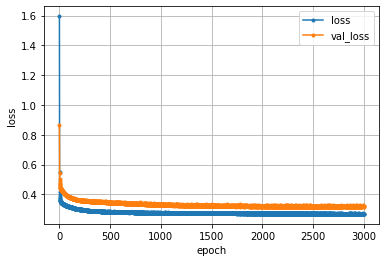

In [81]:
# 学習経過の可視化(大きさ)
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

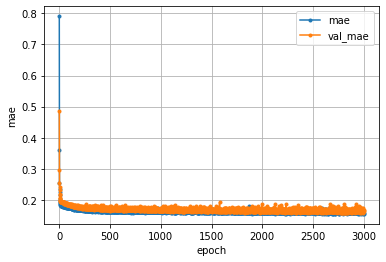

In [82]:
# 学習経過の可視化(大きさ)
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()